In [28]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import os

In [9]:
# Load the dataset from the Excel file
file_path = 'data_files/Mall_Customers.csv'

df = pd.read_csv(file_path)

In [11]:
# Optional: Rename columns for easier access
df.rename(columns={'Annual Income (k$)': 'Annual_Income', 
                   'Spending Score (1-100)': 'Spending_Score'}, inplace=True)

print("Dataset loaded successfully!")
df.head()

Dataset loaded successfully!


,CustomerID,Gender,Age,Annual_Income,Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [13]:
# summary of the dataframe
print("Data Info:")
df.info()

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   CustomerID      200 non-null    int64 
 1   Gender          200 non-null    object
 2   Age             200 non-null    int64 
 3   Annual_Income   200 non-null    int64 
 4   Spending_Score  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [15]:
# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
CustomerID        0
Gender            0
Age               0
Annual_Income     0
Spending_Score    0
dtype: int64


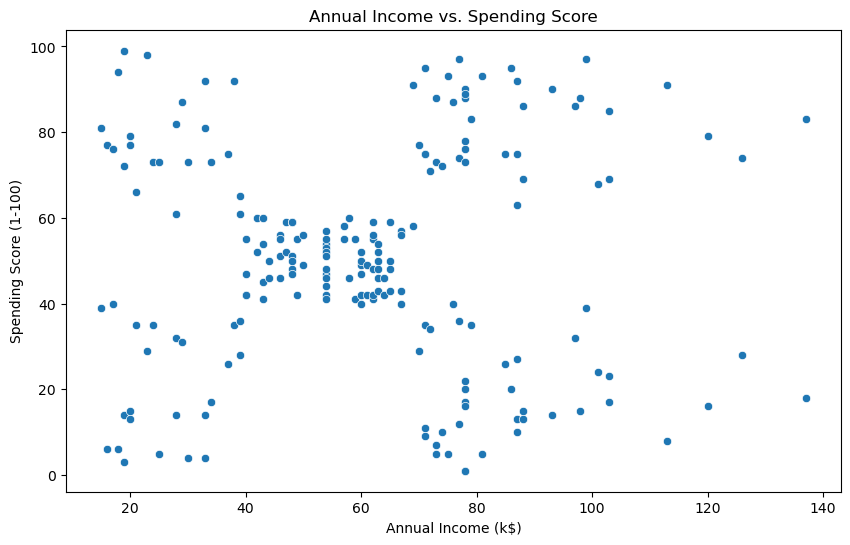

In [17]:
# Visualize the relationship between Annual Income and Spending Score
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Annual_Income', y='Spending_Score', data=df)
plt.title('Annual Income vs. Spending Score')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

In [30]:
os.environ["OMP_NUM_THREADS"] = "1"
# Select the features for clustering
X = df[['Annual_Income', 'Spending_Score']].values

# Calculate WCSS for a range of cluster numbers
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_) # inertia_ gives the WCSS value

C:\Users\New\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\New\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\New\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\New\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with M

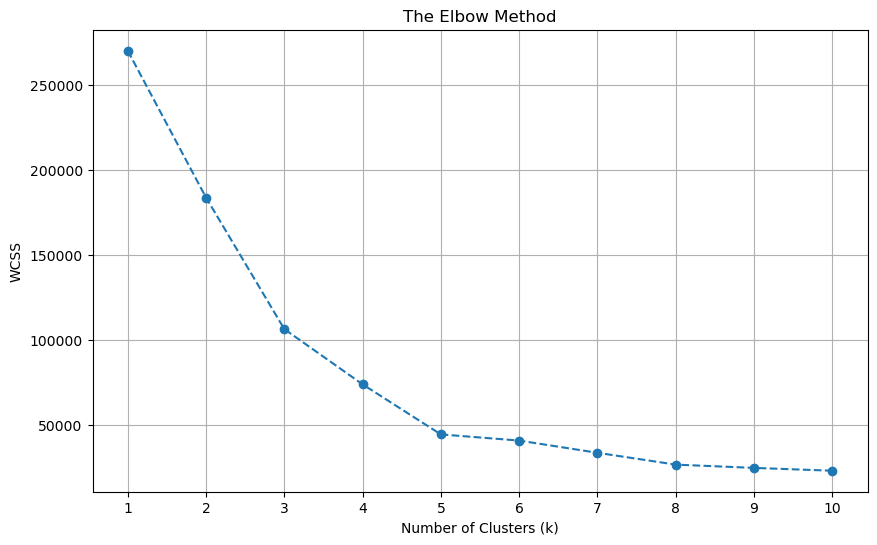

In [22]:
# Plot the Elbow Method graph
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

#### The plot shows a distinct "elbow" at k=5. This is our optimal number of clusters.

In [32]:
# Build the K-Means model with k=5
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)

# Fit the model and predict the cluster for each data point
y_kmeans = kmeans.fit_predict(X)

# Add the cluster labels to the original DataFrame
df['Cluster'] = y_kmeans

print("K-Means model built and clusters assigned.")
df.head()

K-Means model built and clusters assigned.


C:\Users\New\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,CustomerID,Gender,Age,Annual_Income,Spending_Score,Cluster
0,1,Male,19,15,39,4
1,2,Male,21,15,81,2
2,3,Female,20,16,6,4
3,4,Female,23,16,77,2
4,5,Female,31,17,40,4


In [34]:
# Get the coordinates of the cluster centers
centroids = kmeans.cluster_centers_

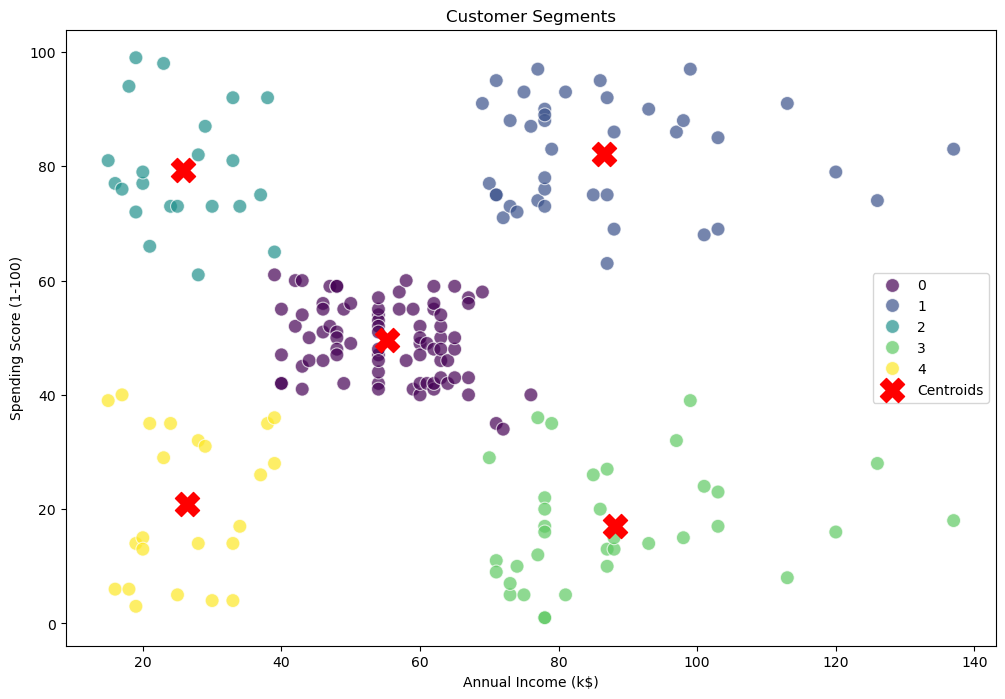

In [40]:
# Get the coordinates of the cluster centers
centroids = kmeans.cluster_centers_

# Visualize the clusters and their centroids
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Annual_Income', y='Spending_Score', hue='Cluster', data=df, palette='viridis', s=100, alpha=0.7, legend='full')

# Plot the centroids
plt.scatter(centroids[:, 0], centroids[:, 1], s=300, c='red', marker='X', label='Centroids')

plt.title('Customer Segments')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

#### Interpreting the Clusters
analyzing the clusters to give them meaningful business labels. Based on the plot, we can define customer personas:

#### Cluster 0 (e.g., Target Customers):
    
                                        High income and high spending score. These are the ideal customers.

#### Cluster 1 (e.g., Careful Spenders):
                                        High income but low spending score. They might need special offers to be convinced.

#### Cluster 2 (e.g., Standard Customers): 
                                        Average income and average spending score. The majority of customers.

#### Cluster 3 (e.g., Low-Income Savers): 
                                        Low income and low spending score.

#### Cluster 4 (e.g., Reckless Spenders): 
                                        Low income but high spending score. Often younger customers who are prime targets for specific product promotions.